In [9]:
import pandas as pd
df = pd.read_csv('datasetFlashScore.csv', delimiter = ';')
# Cria um atributo para o resultado do jogo, servindo como target da IA
resultado_jogo = []

for i in range(len(df['FTHG'])):
    if int(df['FTHG'][i]) > int(df['FTAG'][i]):
        resultado_jogo.append("Vitória do time da casa")
    elif int(df['FTHG'][i]) < int(df['FTAG'][i]):
        resultado_jogo.append("Vitória do time visitante")
    else:
        resultado_jogo.append("Empate")

df['Resultado'] = resultado_jogo

# Cria uma coluna para indicar se o jogo teve 3 gols ou mais
df['Over 2.5'] = df.apply(lambda row: 1 if int(row['FTHG']) + int(row['FTAG']) >= 3 else 0, axis=1)
df = df.drop(['FTAG', 'FTHG'], axis=1)
dfTestes = df.head(20)
dfTreinamento = df.iloc[20:]

In [10]:
from pycaret.classification import *
s = setup(dfTreinamento, target = 'Over 2.5', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Over 2.5
2,Target type,Binary
3,Original data shape,"(360, 41)"
4,Transformed data shape,"(360, 147)"
5,Transformed train set shape,"(251, 147)"
6,Transformed test set shape,"(109, 147)"
7,Numeric features,18
8,Categorical features,22
9,Preprocess,True


In [11]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9525,0.9905,0.9470,0.9498,0.9461,0.9037,0.9071,0.0830
ridge,Ridge Classifier,0.7971,0.8939,0.7235,0.8057,0.7532,0.5837,0.5928,0.0460
svm,SVM - Linear Kernel,0.6454,0.7854,0.5977,0.7236,0.5831,0.2858,0.3504,0.0490
nb,Naive Bayes,0.5895,0.6422,0.5864,0.5237,0.5435,0.1739,0.1783,0.0460
et,Extra Trees Classifier,0.5778,0.5945,0.3841,0.5517,0.4439,0.1213,0.1305,0.0800
lda,Linear Discriminant Analysis,0.5775,0.6018,0.4553,0.5331,0.4856,0.1322,0.1353,0.0510
rf,Random Forest Classifier,0.5737,0.5822,0.4280,0.5237,0.4659,0.1189,0.1218,0.0760
ada,Ada Boost Classifier,0.5657,0.5811,0.4818,0.5328,0.4997,0.1165,0.1193,0.0640
dummy,Dummy Classifier,0.5538,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0480
gbc,Gradient Boosting Classifier,0.5497,0.5777,0.4212,0.5202,0.4477,0.0802,0.0872,0.0770


In [12]:
tuned = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9231,0.9762,0.9167,0.9167,0.9167,0.8452,0.8452
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9600,1.0000,1.0000,0.9167,0.9565,0.9196,0.9226
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9600,1.0000,1.0000,0.9167,0.9565,0.9196,0.9226
6,0.9600,1.0000,1.0000,0.9167,0.9565,0.9196,0.9226
7,0.9200,0.9870,0.8182,1.0000,0.9000,0.8344,0.8461
8,0.9200,0.9740,1.0000,0.8462,0.9167,0.8408,0.8516


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [13]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

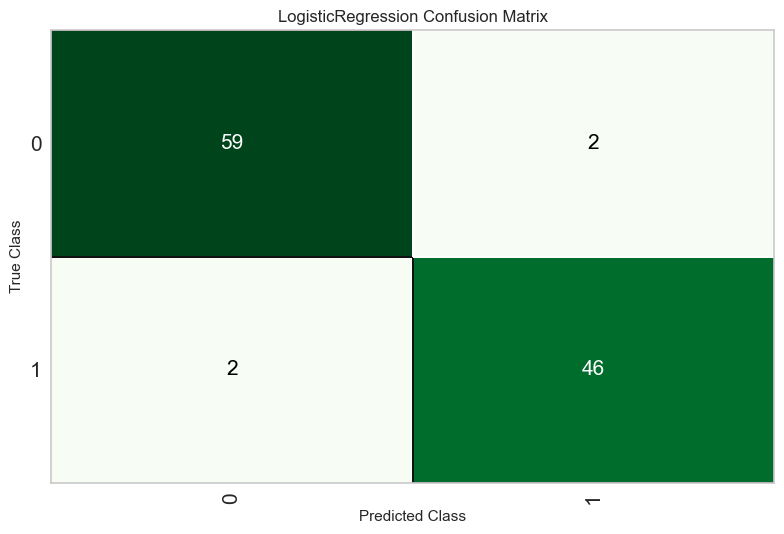

In [14]:
plot_model(best, plot='confusion_matrix')

In [15]:
predictions = predict_model(best, data=dfTestes, raw_score = True)
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9500,0.9899,0.9091,1.0000,0.9524,0.9000,0.9045


,HomeTeam,AwayTeam,DateTime,HGE,AGE,HPB,APB,HTG,ATG,HCG,...,APC,HATK,AATK,HATKP,AATKP,Resultado,Over 2.5,prediction_label,prediction_score_0,prediction_score_1
0,Bahia,Atlético-MG,06.12.2023 21:30,1.50,1.00,38%,62%,14,9,7,...,466,81,111,45,26,Vitória do time da casa,1,1,0.0014,0.9986
1,Coritiba,Corinthians,06.12.2023 21:30,0.55,0.58,43%,57%,12,12,4,...,617,93,104,63,45,Vitória do time visitante,0,0,0.8045,0.1955
2,Cruzeiro,Palmeiras,06.12.2023 21:30,1.26,1.47,51%,49%,14,8,6,...,298,116,60,38,26,Empate,0,0,0.6687,0.3313
3,Cuiabá,Athletico-PR,06.12.2023 21:30,2.74,0.85,47%,53%,12,15,6,...,436,76,102,28,62,Vitória do time da casa,1,1,0.2114,0.7886
4,Fluminense,Grêmio,06.12.2023 21:30,2.10,2.10,62%,38%,20,13,7,...,238,146,68,76,27,Vitória do time visitante,1,1,0.0017,0.9983
5,Internacional,Botafogo,06.12.2023 21:30,1.48,0.45,53%,47%,7,9,3,...,417,104,120,21,31,Vitória do time da casa,1,1,0.0074,0.9926
6,Santos,Fortaleza,06.12.2023 21:30,0.97,0.94,57%,43%,14,14,6,...,231,112,81,72,32,Vitória do time visitante,1,0,0.7896,0.2104
7,São Paulo,Flamengo,06.12.2023 21:30,0.52,0.44,47%,53%,9,8,3,...,479,73,112,26,49,Vitória do time da casa,0,0,0.9914,0.0086
8,Vasco,Red Bull Bragantino,06.12.2023 21:30,1.83,0.88,46%,54%,11,10,5,...,333,88,108,44,35,Vitória do time da casa,1,1,0.1700,0.8300
9,Goiás,América-MG,06.12.2023 19:00,0.91,0.91,46%,54%,12,10,3,...,457,66,128,44,62,Vitória do time da casa,0,0,0.9737,0.0263
